## Kalkulator perhitungan integral dan perhitungan faktorial & kombinasi.

#### mungkin berguna untuk ujian CLO-1 dan CLO-2, silahkan dimanfaatkan sebaik-baiknya

In [ ]:
from sympy import *
init_printing(use_unicode=False, wrap_line = False)
from sympy import pi, sin, cos
from sympy.functions import exp

In [ ]:
!ls


sample_data


In [ ]:
# perhitungan integral satu variabel simbolik (Anti Turunan)
x = Symbol('x')

#INPUT f(x) here, function of x:
def f(x):
  return x**2 + x + 1   # <---- INPUT the function here

print('hasil anti turunan: ')
integrate(f(x),x)


hasil anti turunan: 


In [ ]:
# Perhitungan integral lipat dua simbolik (Anti Turunan)
x, y = symbols('x y', real=True)

#input f(x,y) here 
def f2(x,y):
  return cos(pi*x)+sin(y) # <---- INPUT the function f(x,y) here

print('hasil anti turunan: ')
integrate(integrate(f2(x,y),x),y)

hasil anti turunan: 


 ## Hitung integral satu variabel, dengan nilai batas konstan 

CONTOH: $   f(x)=\int_{0}^{2}\ 3x\ dx  $

In [ ]:
# perhitungan integral satu variabel dengan batas
from scipy.integrate import quad
import numpy as np

'''Untuk fungsi exponensial, cos , sin, dan pi, silakan masing-masing gunakan syntax np.exp, np.sin, np.cos, np.pi'''

# INPUT fungsi f(x)
def integrand(x):
    'Harus integralkan y dulu baru x'
    return  (3*x)

# inputkan batas x (harus konstanta)
x_atas = 2
x_bawah = 0

ans, err = quad(integrand, x_bawah, x_atas)
print( ans)

6.0


 ## Hitung integral lipat dua, dengan batas 

CONTOH: $   f(x,y)=\int_{0}^{2}\int_{x}^{6-x^2}\ (3x+2y)\ dydx  $

In [ ]:
# Perhitungan integral lipat dua dengan batas, integralkan y dulu baru x
from scipy.integrate import dblquad
import numpy as np

# input fungsi f(x,y)
def integrand2(y, x):
    'Harus integralkan y dulu baru x'
    return  (3*x+2*y)

# inputkan batas x (harus konstanta)
x_bawah = 0
x_atas = 2

ans, err = dblquad(integrand2, x_bawah, x_atas,
                   lambda x: x,          #<--- input y batas bawah, bisa dalam fungsi x atau bilangan
                   lambda x: 6-x**2)     #<--- input y batas atas, bisa dalam fungsi x atau bilangan
print( ans)

59.733333333333334


## Menghitung nilai kombinasi

${n \choose k }= \frac{n!}{k! \cdot (n-k)!}$

$P(X=2) =Binom(2;n=10,p=0.5) = {10 \choose 2 } \cdot (0.5)^2 \cdot (1-0.5)^8$


In [ ]:
import math
def kombinasi(n,k):
  return math.factorial(n)/math.factorial(k)/math.factorial(n-k)

#input nilai n dan k
n = 3
k = 1

print('Nilai kombinasinya adalah: ',kombinasi(n,k))  
print('hasil = ', kombinasi(15,50)*(0.6**50.)*(0.4**50.))

Nilai kombinasinya adalah:  3.0
hasil =  0.01033751125384763


In [ ]:
def func(x,y):
  return kombinasi(3,x)*kombinasi(2,y)*kombinasi(3,4-x-y)/kombinasi(8,4)

In [ ]:
print(func(0,1)+func(0,2)+func(1,0)+func(1,1)+func(2,0))

0.49999999999999994


In [ ]:
print('hasil = ', (kombinasi(50,2)*kombinasi(50,6)/kombinasi(100,8)))

hasil =  0.10460705986934263


# Berguna hanya untuk CLO-3 dan CLO-4

## Kalkulator Fungsi distribusi Khusus untuk peubah acak diskrit dan kontinyu (CLO-3) 

In [ ]:
import scipy.stats as ss
import numpy as np
import math

In [ ]:
mu = 2 # mobil per jam
n=1875
p=0.004
mu1= 50 # per jam
mu2= 5/6 # per menit
# 1-P(X<=60)
print(1-ss.poisson.cdf(60,mu1))
# 1-P(Y<=1)
print(1-ss.poisson.cdf(1,mu2))
# Soal NO.2 dist poisson
print(1-ss.poisson.cdf(2,1))
# Soal no.4 dist.poisson
print(np.exp(-6)*6**4/math.factorial(4))
print(ss.poisson.pmf(4,6))


0.07216017981325695
0.20323661773702328
0.08030139707139416
0.13385261753998337
0.13385261753998332


In [ ]:
# soal nomor 5 kesalahan pada pengiriman pesan
## x~ poisson
mu=2
print(1-ss.poisson.cdf(2,mu))
## x~binomial
n=200
p=1/100
print(1-ss.binom.cdf(2,n,p))

0.3233235838169366
0.3233213054643431


In [ ]:
# Soal nomor 6 poisson distribution
## bag a
print(1-ss.poisson.cdf(1,1))
print(1-ss.binom.cdf(1,100,0.01))
## bag b
print(ss.poisson.cdf(1,5)) 
print(ss.binom.cdf(1,100,0.05))


0.26424111765711533
0.26423802107704364
0.04042768199451279
0.037081209327355036


In [ ]:
# DISTRIBUSI UNIFORM
print(1-ss.uniform.cdf(4,2,7))

0.7142857142857143


In [ ]:
# Binomial DIstribution
# Evaluate binomial distribution value f(x) (pmf: probability mass function)
def fval_binom(x,n,p):
  return ss.binom.pmf(x,n,p)

## Contoh hitung f(3;n=10,p=0.4):  
#print(fval_binom(50,100,0.6), kombinasi(100,50)*(0.6**50.)*(0.4**50.))


## Evaluate cummulative distribution function F(x) = P(X<=x). Contoh P(X<=5) dengan n=10 dan p=0.5.
print(ss.binom.cdf(4,15,0.7))
print(1-ss.binom.cdf(7,15,0.7))
print(ss.binom.cdf(10,15,0.7)-ss.binom.cdf(4,15,0.7))
#print(sum([ss.binom.pmf(x,10,0.5) for x in range(6)]))

0.000672234069807001
0.9499874599462239
0.4838367067033501


# $1 - P(X\leq 14)$, dengan n=50, dan p=0.2

`

In [ ]:
import math 
print(1 - ss.binom.cdf(14,50,0.2))
print(ss.binom.cdf(15,20,0.2) - ss.binom.cdf(4,20,0.2))
print((14-10)/math.sqrt(8) + 0.5)

0.06072207963194909
0.3703517222938658
1.914213562373095


In [ ]:
## POISSON DISTRIBUTION

# Evaluate poisson distribution function f(x) (pmf: probability mass function) with parameter lambd: rata-rata X dalam suatu periode waktu. 
def fval_poiss(x,lambd):
  return ss.poisson.pmf(x,lambd)
  
print(fval_poiss(3,2.4), math.exp(-2.4)*(2.4**3)/math.factorial(3))

## Evaluate cummulative poisson distribution F(x) = P(X<x). Contoh P(X<=5) dengan lambd = 2
print(ss.poisson.cdf(5,2))



# jawaban contoh soal
print(1- ss.poisson.cdf(2,7))

# jawaban contoh soal 4
print(ss.poisson.pmf(2,7/4), math.exp(-7/4)*(7/4)**2./math.factorial(2))

0.20901416437880638 0.2090141643788064
0.9834363915193856
0.9703638361194782
0.26609135090849406 0.2660913509084941


In [ ]:
# jawaban contoh soal-1
##Nomor.a
print(fval_poiss(3,2.4), math.exp(-2.4)*(2.4**3)/math.factorial(3))

## Nomor.b P(X<=4)
print(ss.poisson.cdf(4,2.4))

## Nomor.c P(X>5) = 1 - P(X<=5) , X~Pois(x;\lambda = 2.4)
print(1-ss.poisson.cdf(5,2.4))

## Nomor.d P(X>10) = 1- P(X<=10)  , X~Pois(x;\lambda = 12)
print(1-ss.poisson.cdf(10,12))

##
print(1-ss.poisson.cdf(5,5), 1-0.6160)

0.20901416437880638 0.2090141643788064
0.9041314096636008
0.035672510995303
0.6527705824458281
0.38403934516693705 0.384


In [ ]:
print(fval_binom(5,1000,0.02))
print(fval_poiss(5,1000*0.02), math.exp(-20)*(20**5)/math.factorial(5))

NameError: ignored

In [ ]:
## HYPERGEOMETRIC
# Evaluate hypergeometric distribution function f(x) (pmf) when given parameters [N,k,n] are [N:Total population, k:total pop for x, n: number of sample]
# Contoh hitung f(5) = hypergeom(x=5;N=100, k=50, n=20)
[N,k,n] = [100,50,8]
# print('hasil banding = ', ss.hypergeom.pmf(0,N,k,n), (kombinasi(50,0)*kombinasi(50,8)/kombinasi(100,8)))

# Evaluate the cummulative hypergeometric distribution function. Misal hitung: F(10) = P(X<=8) with parameter [N,k,n]
# print(1-ss.hypergeom.cdf(1,60,5,10))
# print(ss.hypergeom.pmf(1,60,5,10))
#hypergeometri
print("hypergeom.= ",ss.hypergeom.cdf(7,10000,4000,15))
#binomial
print("binomial= ",ss.binom.cdf(7,15,0.4))

# jawaban soal 6
#int(ss.hypergeom.pmf(3,50,12,10), kombinasi(12,3)*kombinasi(38,7)/kombinasi(50,10))

hypergeom.=  0.7870622512740173
binomial=  0.786896817389568


In [ ]:
## N=9, k=4, n=6, x = 2 P(X>=2) = 1 - P(X<2) = 1 - P(X<=1)
N,k,n=9,4,6
print(ss.hypergeom.pmf(2, 9, 4, 6))
print(kombinasi(4,2)*kombinasi(5,4)/kombinasi(9,6))
print(ss.hypergeom.cdf(1, 9,4,6))
print(n*(k/N)*(1-k/N)*(N-n)/(N-1))

In [ ]:
#poisson hitungf
import math
print(ss.poisson.pmf(3,2.4))
print(np.exp(-2.4)*(2.4)**3/math.factorial(3))

0.20901416437880638
0.2090141643788064


In [ ]:
# P(9<X<=14) = P(X<=14) - P(X<=9) 
N=1700; k = 11900; n=18
print(0.7*17000)
print(ss.hypergeom.cdf(14,N,k,n) - ss.hypergeom.cdf(9,N,k,n))
print(ss.binom.cdf(14,18,0.7)-ss.binom.cdf(9,18,0.7))
print(0.8354-0.0596)

It is estimated that 4000 of the 10,000 voting residents of a town are against a new electricity price. \\

If 15 eligible voters are selected at random and asked their opinion, \\

what is the probability that at most 7 favor the new electricity price?

$P(X \leq 7)$

In [ ]:
N=10000; k = 6000; n= 15
p=k/N 
print(ss.hypergeom.cdf(7,N,k,n))
print(ss.binom.cdf(7,n,p))


In [ ]:
# Uniform Distribution
# Evaluate Uniform DIstribution function f(x)
def fval_unif(x,a,b):
  return ss.uniform.pdf((x-a)/(b-a))

#Evaluate cummulative distribution function F(x) = P(X<x)
print(ss.uniform.cdf(3, 2, 5))

print(ss.uniform.pdf(3,2,5))
# print(ss.uniform.pdf())

In [ ]:
#Exponential Distribution
# Evaluate Exponential Distribution function f(x), with parameter beta is in time unit and its the expectation of exp random variable. 
def fval_exp(x,beta):
  return ss.expon.pdf(1,0,beta)
print(fval_exp(1,2)," is a value for f(x=1;beta=2)")

# Evaluate cummulative distribution function F(x) = P(X<x) for exponential distribution, cth: P(X<1) for \beta = 2. 
print(ss.expon.cdf(3,0,4)) 


In [ ]:
import scipy.stats as ss
# Normal Distribution
# Evaluate normal distribution function f(x) (pdf), with parameter miu (mean) and sig (standard deviation).
def fval_norm(x,mu,sig):
  return ss.norm.pdf((x-mu)/sig)

print(fval_norm(0.5,0.5,1)) 

# Evaluate cummulative distribution function F(x) = P(X<x) with parameter miu and sig.
def fval_cumnorm(x,mu,sig):
  return ss.norm.cdf((x-mu)/sig)

print(ss.norm.cdf(-2.10))
print(1-ss.norm.cdf(2.10))
print(ss.expon.cdf(3))
print(ss.poisson.cdf(10,12))



0.3989422804014327
0.017864420562816542
0.017864420562816563
0.950212931632136
0.3472294175541719


In [ ]:
print((14.5-10)/math.sqrt(8) )
print(1 - ss.norm.cdf(1.590)) # fungsi scipy.stat
print(1- 0.9441) #dari tabel

In [ ]:
print(ss.binom.cdf(15,50,0.2) - ss.binom.cdf(4,50,0.2))
print((15.5-10)/math.sqrt(8), (4.5-10)/math.sqrt(8))
print(ss.norm.cdf(1.94) - ss.norm.cdf(-1.94))
print(0.9738 - 0.0262)

In [ ]:
n =80 ;p = 0.25
mu = n*p; sig = math.sqrt(n*p*(1-p))
print(ss.binom.cdf(30,80,0.25) - ss.binom.cdf(24, 80,0.25), '<-- dist. binomial')
print(ss.norm.cdf((30+0.5-mu)/sig) - ss.norm.cdf((24+0.5-mu)/sig), '<-- hampiran dist. Normal')

In [ ]:
n = 200; p=0.1
mu = n*p
sig = math.sqrt(mu*(1-p))
# soal no.6.a 
print(ss.binom.pmf(8, n,p), '<-- dist. binomial')
print(ss.norm.cdf((8.5-mu)/sig) - ss.norm.cdf((7.5-mu)/sig), '<-- dist. normal')

# Soal no.6.b
print( 1 - ss.binom.cdf(11,n,p), '<-- dist. binomial')
print(1 - ss.norm.cdf((11.5-mu)/sig), '<-- dist. normal')

Pengaruh nilai n terhadap ketelitian hampiran normal untuk Binomial.

MIsalkan kita akan menghitung $P(X = \frac{n}{2})$, dan melihat bagaimana pengaruh nilai $n$ yang semakin besar terhadap nilai hampiran dist.Normal untuk dist.Binomial.

$P(2\leq X \leq 3)$

In [ ]:
 import numpy as np
 # Misal
 n = [50+10*i for i in range(0,100)]
 p = 0.5
 x = [int(0.5*k) for k in n]
 abs_er = [abs(ss.binom.pmf(i,j,p) - (ss.norm.cdf((i+0.5 - j*p)/math.sqrt(j*p*(1-p)),j,p) - ss.norm.cdf((i-0.5 - j*p)/math.sqrt(j*p*(1-p)),j,p))) for (i,j) in zip(x,n)]
 pv = np.linspace(0.01,1,100)
 nf = 1000
 xf = nf/2
 ver_p = [abs(ss.binom.pmf(xf,nf,p) - (ss.norm.cdf((xf+0.5 - nf*p)/math.sqrt(nf*p*(1-p)),nf,p) - ss.norm.cdf((xf-0.5 - nf*p)/math.sqrt(nf*p*(1-p)),nf,p))) for p in pv]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(n,abs_er)
plt.xlabel("n")
plt.ylabel("$|P_{binom} - P_{normal}|$")
plt.show()

plt.plot(pv,ver_p)
plt.xlabel('$p_{sukses}$')
plt.ylabel("$|P_{binom} - P_{normal}|$")
plt.show()
print(abs_er[len(abs_er) - 1])

In [ ]:
N=10000; n=15; k=2000; p=k/N;
print(ss.hypergeom.cdf(3,N,k,n) - ss.hypergeom.cdf(1,N,k,n))
print(n*(k/N)*(1.- (k/N))*(N-n)/(N-1), 'variansi')
print(n*k/N)
# ditanya P(X<=7)
print(ss.hypergeom.cdf(7,N,k,n), 'hipergeometri')
print(ss.binom.cdf(7,n,p), 'binomial')

0.4812818381027856
2.396639663966397 variansi
3.0
0.9957892280749154 hipergeometri
0.995760250290176 binomial


In [ ]:
import math
n=20; p= 0.4;
print(13000*(1.1)**(n*p + math.sqrt(n*p*(1.-p))))

In [ ]:
print(n*p)

In [ ]:
import math
# SOal NO.1 P(X>=15)
print('soal No.1a')
n = 50; p=0.2; 
mu = n*p; sig = math.sqrt(n*p*(1-p))
print(1-ss.binom.cdf(14,n,p ), 'X berdistribusi binomial')
print(1-ss.norm.cdf((14.5-mu)/sig), 'X berdistribusi Normal \n')

print('soal No.1b')
print(ss.binom.cdf(15,n,p) - ss.binom.cdf(4,n,p), 'X~Binom')
print(ss.norm.cdf((15.5-mu)/sig) - ss.norm.cdf((4.5-mu)/sig), 'X~ Normal')


soal No.1a
0.06072207963194909 X berdistribusi binomial
0.05580588414914611 X berdistribusi Normal 

soal No.1b
0.9507005621577431 X~Binom
0.9481700727820903 X~ Normal


In [ ]:
# soal no.2 P(25<=X<=30)= P(X<=30) - P(X<25) = P(X<=30) - P(X<=24), X~binom
print('No.2')
n = 80; p = 0.25; mu = n*p; sig = math.sqrt(n*p*(1-p))
print(ss.binom.cdf(30,n,p ) - ss.binom.cdf(24,n,p ),'X~binomial')
print(ss.norm.cdf((30.5-mu)/sig) - ss.norm.cdf((24.5-mu)/sig), 'X~ normal')

No.2
0.11927050150855678 X~binomial
0.11928592059948362 X~ normal


In [ ]:
# Soal No.4:
n = 1000;p= 0.2; mu = n*p ; sig = math.sqrt(n*p*(1-p))

# No. 4a. X~binomial
print('Nomor 4a')
print(ss.binom.cdf(184, n, p) - ss.binom.cdf(170, n, p),'x~ binom')
print(ss.norm.cdf((184.5-mu)/sig) - ss.norm.cdf((170.5-mu)/sig),'X~normal') 

# nomor 4b X~normal
print('Nomor 4b')
print(1-ss.binom.cdf(250, n,p), 'x~binom')
print(1 - ss.norm.cdf((250.5-mu)/sig), 'x~normal')

Nomor 4a
0.10053124529672369 x~ binom
0.1003699332483258 X~normal
Nomor 4b
5.070453650835027e-05 x~binom
3.270733323335051e-05 x~normal


In [ ]:
n = 100; p=0.4; mu = n*p; sig = math.sqrt(n*p*(1-p))
print(ss.binom.cdf(25,n,p) - ss.binom.cdf(14,n,p)) # x~binomial
print(ss.norm.cdf((25.5-mu)/sig) - ss.norm.cdf((14.5-mu)/sig)) # x~binomial

0.0011889876806261293
0.0015390966465485944


In [ ]:
n = 200;p = 0.1; mu=n*p; sig = math.sqrt(n*p*(1-p))
print(ss.binom.pmf(8, n, p))
print(ss.norm.cdf((8.5-mu)/sig) - ss.norm.cdf((7.5-mu)/sig))

0.0009030369045712714
0.0017502080962467394


In [ ]:
# X~N(0,1), P(X<0.88)
print(ss.norm.cdf(0.85) - ss.norm.cdf(-0.55))

0.5111777700889613


In [ ]:
print(500*(1 - ss.norm.cdf(3/2)))

33.40360063442904


In [ ]:
import math
n = 150; p = 0.15; mu = n*p ; sig =math.sqrt(n*p*(1-p)) 
print(1 - ss.binom.cdf(30, n, p), '<-- hasil binomial')
print(1 - ss.norm.cdf((30.5 - mu)/sig), '<-- hasil normal')

0.03780157877148915 <-- hasil binomial
0.03367597375943021 <-- hasil normal


In [ ]:
import scipy.stats as ss
import numpy as np
import math

In [ ]:
# SOal No.1
print(ss.norm.cdf(-5/16))

# Soal No.2
print(1 - ss.norm.cdf((360- 4*75)/16/2))

print(1 - ss.norm.cdf(0.26*8/math.sqrt(3)))

0.37733028152984294
0.030396361765261393
0.11489721625775651


In [ ]:
print(0.8 - (0.4)**2.)
print(0.64*40)

0.64
25.6


In [ ]:
print(ss.norm.ppf(0.1))

-1.2815515655446004


In [ ]:
print(ss.norm.cdf((2.1-2)/math.sqrt(0.04)) - ss.norm.cdf((1.9-2)/math.sqrt(0.04)))

0.3829249225480265


In [ ]:
import scipy.stats as ss
import math

In [ ]:
print(1 - ss.norm.cdf((110-100)/24))

0.3384611195106897


In [ ]:
print(1 - ss.norm.cdf((110-100)*6/24))

0.006209665325776159


In [ ]:
print(ss.norm.cdf((70-75)/16))
print(1 - ss.norm.cdf((360 - 4*75)/32))

0.37733028152984294
0.030396361765261393


In [ ]:
print(1 - ss.norm.cdf((1.26-1)/math.sqrt(3/64)))

0.11489721625775651


In [ ]:
print(1 - ss.norm.cdf((25-16)/math.sqrt(25.6)))

0.037637821602419685


In [ ]:
print(ss.norm.ppf(0.1))

-1.2815515655446004


$ c = \frac{(3.4 - 3.5)\sqrt{n}}{0.4}$ 

In [ ]:
c = ss.norm.ppf(0.05)
print((2*c/0.1)**2)

1082.2173816381658


In [ ]:
print(ss.norm.cdf(0.1/0.2) - ss.norm.cdf(-0.1/0.2))

0.38292492254802624


In [ ]:
print(ss.norm.cdf((100-96)/math.sqrt(64/12)))

0.9583677416682248


In [ ]:
import scipy.stats as ss
import math

In [ ]:
print(ss.norm.cdf(1.96))

0.9750021048517795


In [ ]:
print(ss.norm.cdf(-0.65) - ss.norm.cdf(-2.16))

0.24245977602193927


In [ ]:
print(1- ss.norm.cdf((224-200)/15))

0.054799291699557995


In [ ]:
import scipy.stats as ss
import math
print(ss.binom.pmf(4,6,math.exp(-3/2)))

0.022439898606860548


In [ ]:
p=1-math.exp(-1/3)
print("peluang 40 mengklaim dari 50 penjualan= ", 1-ss.binom.cdf(40,50,p))

peluang 40 mengklaim dari 50 penjualan=  4.884981308350689e-15


In [ ]:
lmd=30/3.2 # menit
print("P(X<60)= ",ss.expon.cdf(60,lmd))
print(1-math.exp(-1/lmd*60))


P(X<60)=  1.0
0.998338442726826


In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

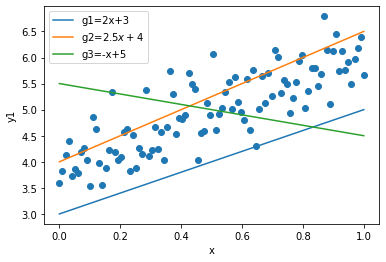

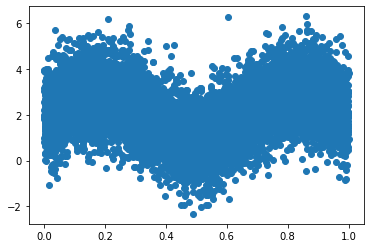

In [ ]:
n=100
m=10000
x=np.linspace(0,1,n)
xm=np.linspace(0,1,m)
ex1 =np.random.randn(n)*0.5+1
ex2 =np.random.randn(n)*1+2
y1 = 2*x+3+ex1
y2 = 2*x+3+ex2
y3 = np.sin(np.pi*x)+ex2
y4 = np.sin(3*np.pi*x)+ex2
plt.scatter(x,y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.plot(x,2*x+3, label="g1=2x+3")
plt.plot(x,2.5*x+4, label = "g2=$2.5x+4$")
plt.plot(x,5.5-1*x, label="g3=-x+5")
plt.legend()
plt.show()
ex2m =np.random.randn(m)*1+2
y5 = np.sin(3*np.pi*xm)+ex2m
plt.scatter(xm,y5)

In [ ]:
x = np.append(x, np.repeat(np.nan, m-n))
y1 = np.append(y1, np.repeat(np.nan, m-n))
y2 = np.append(y2, np.repeat(np.nan, m-n))
y3 = np.append(y3, np.repeat(np.nan, m-n))
y4 = np.append(y4, np.repeat(np.nan, m-n))

In [ ]:
# np.savetxt('data.xlsx', [x,xm,y1,y2,y3,y4,y5], delimiter=',')
df = pd.DataFrame({"x" : x, "x2" : xm, "y1" : y1,  "y2" : y2,  "y3" : y3, "y4" : y4, "y5" : y5})
df.to_csv("sample.csv", index=True)

In [ ]:
print(x.shape, y1.shape, y2.shape, y3.shape, xm.shape)

(10000,) (10000,) (10000,) (10000,) (10000,)


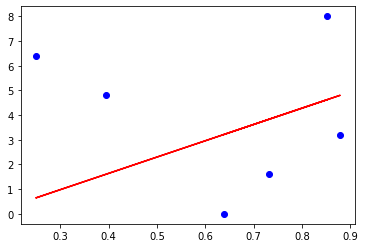

In [ ]:
# plt.scatter([0,0.3, 0.8, 0.6], [0,3,5,8])
x = [np.random.rand() for i in range(6) ]
y = [1.6*i for i in range(6) ]
plt.scatter(x,y , color='b')
plt.plot(x,6.6*np.array(x)-1 , color='r')

In [ ]:
pd.DataFrame({"X":x, "Y":y})

,X,Y
0,0.637855,0.0
1,0.731012,1.6
2,0.878966,3.2
3,0.394735,4.8
4,0.249587,6.4
5,0.851657,8.0


In [ ]:
import numpy as np
import scipy.stats as ss
import math

In [ ]:
a=2
b=7
print(1-ss.uniform.cdf(4,a,b), (3/5))


0.7142857142857143 0.6


In [ ]:
p=-(np.exp(-1/3)-1) # peluang barang perusahaan diklaim
print(1-ss.binom.cdf(40,50, p))

4.884981308350689e-15


In [ ]:
p=1+(np.exp(-15/10)-1)
## P(Y=4), y~Binom(n=6, p)
print(ss.binom.pmf(4,6,p))
print(6*5/2*p**4*(1-p)**2)

0.02243989860686053
0.02243989860686055


In [ ]:
import scipy.stats as ss
import math

In [ ]:
p = 1-math.exp(-1/2)
print(p)
print(ss.binom.cdf(30,100,p))

0.3934693402873666
0.03347123582330515


In [ ]:
print(ss.poisson.cdf(10,12))

0.3472294175541719
